# Scaling

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read dataframe in
df = pd.read_csv('data/kickstarter_preprocess.csv')

In [3]:
df.columns

Index(['backers_count', 'country', 'goal', 'staff_pick', 'state',
       'usd_pledged', 'blurb_len_c', 'blurb_len_w', 'slug_len_c', 'slug_len_w',
       'cat_in_slug', 'category_parent_id', 'category_id', 'category_name',
       'created_year', 'created_month', 'deadline_year', 'deadline_month',
       'launched_year', 'launched_month', 'duration_days', 'preparation',
       'pledged_per_backer', 'rel_pledged_goal', 'filled_parent',
       'parent_name'],
      dtype='object')

### features to keep: preparation, duration_days, goal, pledged_per_backer, parent_name, staff_pick, blurb_len_w, slug_len_w, 'launched_month'

In [4]:
# drop unimportant features
df.drop(['backers_count', 'country', 'usd_pledged', 'blurb_len_c', 'slug_len_c', 'cat_in_slug', 
         'category_parent_id', 'category_id', 'category_name', 'created_year', 'created_month', 'deadline_year', 
         'deadline_month', 'launched_year', 'rel_pledged_goal', 'filled_parent'], 
        axis=1, inplace=True)

In [5]:
df.columns

Index(['goal', 'staff_pick', 'state', 'blurb_len_w', 'slug_len_w',
       'launched_month', 'duration_days', 'preparation', 'pledged_per_backer',
       'parent_name'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177593 entries, 0 to 177592
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   goal                177593 non-null  float64
 1   staff_pick          177593 non-null  bool   
 2   state               177593 non-null  object 
 3   blurb_len_w         177593 non-null  int64  
 4   slug_len_w          177593 non-null  int64  
 5   launched_month      177593 non-null  int64  
 6   duration_days       177593 non-null  int64  
 7   preparation         177593 non-null  int64  
 8   pledged_per_backer  177593 non-null  int64  
 9   parent_name         177593 non-null  object 
dtypes: bool(1), float64(1), int64(6), object(2)
memory usage: 12.4+ MB


## drop rows with state == canceled, rows with wrong categories

In [7]:
df = df.drop(df[df['state'] == "canceled" ].index)
df.shape

(168975, 10)

In [8]:
categories = ["Games", "Art", "Photography", "Film & Video", "Design", "Technology"]
df = df[df.parent_name.isin(categories)]
df.shape

(82036, 10)

## make dummies (staff_pick, state, category_name)

In [9]:
df.staff_pick = df.staff_pick.astype('int')

In [10]:
df['state'] = np.where(df['state'] == 'successful', 1, 0)
df.groupby('state').state.count()

state
0    38660
1    43376
Name: state, dtype: int64

In [11]:
# convert the categorical variable parent_name into dummy/indicator variables
df_dum2 = pd.get_dummies(df.parent_name, prefix='parent_name')
df = df.drop(['parent_name'], axis=1)
df = pd.concat([df, df_dum2], axis=1)

In [12]:
# making a categorical variable for launched_month q1, q2, q3, q4 
df.loc[df['launched_month'] <  4, 'time_yr'] = 'q1'
df.loc[(df['launched_month'] >=  4) & (df['launched_month'] <  7), 'time_yr'] = 'q2'
df.loc[(df['launched_month'] >=  7) & (df['launched_month'] <  10), 'time_yr'] = 'q3'
df.loc[df['launched_month'] >  9, 'time_yr'] = 'q4'

In [13]:
df_dum3 = pd.get_dummies(df.time_yr, prefix='time_yr')
df = df.drop(['time_yr'], axis=1)
df = df.drop(['launched_month'], axis=1)
df = pd.concat([df, df_dum3], axis=1)

In [14]:
df.columns

Index(['goal', 'staff_pick', 'state', 'blurb_len_w', 'slug_len_w',
       'duration_days', 'preparation', 'pledged_per_backer', 'parent_name_Art',
       'parent_name_Design', 'parent_name_Film & Video', 'parent_name_Games',
       'parent_name_Photography', 'parent_name_Technology', 'time_yr_q1',
       'time_yr_q2', 'time_yr_q3', 'time_yr_q4'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82036 entries, 0 to 177591
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   goal                      82036 non-null  float64
 1   staff_pick                82036 non-null  int64  
 2   state                     82036 non-null  int64  
 3   blurb_len_w               82036 non-null  int64  
 4   slug_len_w                82036 non-null  int64  
 5   duration_days             82036 non-null  int64  
 6   preparation               82036 non-null  int64  
 7   pledged_per_backer        82036 non-null  int64  
 8   parent_name_Art           82036 non-null  uint8  
 9   parent_name_Design        82036 non-null  uint8  
 10  parent_name_Film & Video  82036 non-null  uint8  
 11  parent_name_Games         82036 non-null  uint8  
 12  parent_name_Photography   82036 non-null  uint8  
 13  parent_name_Technology    82036 non-null  uint8  
 14  time_

In [16]:
df.head()

,goal,staff_pick,state,blurb_len_w,slug_len_w,duration_days,preparation,pledged_per_backer,parent_name_Art,parent_name_Design,parent_name_Film & Video,parent_name_Games,parent_name_Photography,parent_name_Technology,time_yr_q1,time_yr_q2,time_yr_q3,time_yr_q4
0,1000.00,0,1,22,4,30,8,41,0,0,0,1,0,0,0,0,1,0
2,12160.66,0,0,23,7,59,5,55,0,0,0,1,0,0,1,0,0,0
15,54737.83,0,0,3,2,20,3,5,1,0,0,0,0,0,0,0,1,0
16,2602.33,0,1,19,3,21,2,38,0,0,0,0,1,0,0,0,0,1
18,5000.00,0,1,25,7,29,0,84,1,0,0,0,0,0,1,0,0,0


## Train-Test-Split

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score

In [18]:
y = df.state
X = df.drop('state', axis=1)

In [19]:
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Scaling


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
# we have to define which columns we want to scale.
col_scale = ['goal', 'blurb_len_w', 'slug_len_w', 'duration_days', 'preparation', 'pledged_per_backer']

### Data standardization

In [22]:
# Scaling with standard scaler
scaler = StandardScaler()
X_train_scaled_st = scaler.fit_transform(X_train[col_scale])
X_test_scaled_st = scaler.transform(X_test[col_scale])

In [23]:
# Concatenating scaled and dummy columns 
X_train_preprocessed_st = np.concatenate([X_train_scaled_st, X_train.drop(col_scale, axis=1)], axis=1)
X_test_preprocessed_st = np.concatenate([X_test_scaled_st, X_test.drop(col_scale, axis=1)], axis=1)

### Data normalization

# Scaling with MinMaxScaler

# Try to scale you data with the MinMaxScaler() from sklearn. 
# It follows the same syntax as the StandardScaler.
# Don't forget: you have to import the scaler at the top of your notebook. 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled_nor = scaler.fit_transform(X_train[col_scale])
X_test_scaled_nor = scaler.transform(X_test[col_scale])

# Concatenating scaled and dummy columns 
X_train_preprocessed_nor = np.concatenate([X_train_scaled_nor, X_train.drop(col_scale, axis=1)], axis=1)
X_test_preprocessed_nor = np.concatenate([X_test_scaled_nor, X_test.drop(col_scale, axis=1)], axis=1)

## Model Classification

### Logistic Regression

In [24]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [25]:
# fit model
lr = LogisticRegression()
lr.fit(X_train_preprocessed_st, y_train)

LogisticRegression()

In [26]:
print(lr.coef_)
print(lr.intercept_)

[[-2.14483436e+01 -1.21149062e-01  2.26737077e-01 -2.95282894e-01
   9.79689147e-03  1.08183168e+00  2.37757995e+00  1.13095036e-01
   2.09875828e-01  2.24692381e-01  4.30552526e-01 -6.71390931e-01
  -8.13142972e-01 -5.44506715e-02 -1.14604964e-01 -2.19709134e-01
  -1.17553362e-01]]
[-0.51375838]


In [27]:
y_pred = lr.predict(X_test_preprocessed_st)

In [28]:
confusion_matrix(y_test, y_pred)

array([[5291, 2441],
       [1823, 6853]])

In [ ]:
# normalization
#print (classification_report(y_test, y_pred))

In [29]:
# standardization
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71      7732
           1       0.74      0.79      0.76      8676

    accuracy                           0.74     16408
   macro avg       0.74      0.74      0.74     16408
weighted avg       0.74      0.74      0.74     16408



In [30]:
df.groupby('state').state.count()

state
0    38660
1    43376
Name: state, dtype: int64

### Kernel SVM

In [31]:
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [32]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train_preprocessed_st.shape,  y_train.shape)
print ('Test set:', X_test_preprocessed_st.shape,  y_test.shape)

Train set: (65628, 17) (65628,)
Test set: (16408, 17) (16408,)


In [33]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(X_train_preprocessed_st, y_train) 

SVC()

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.74      0.68      0.71      7732
           1       0.74      0.79      0.76      8676

    accuracy                           0.74     16408
   macro avg       0.74      0.74      0.74     16408
weighted avg       0.74      0.74      0.74     16408

Confusion matrix, without normalization
[[5291 2441]
 [1823 6853]]


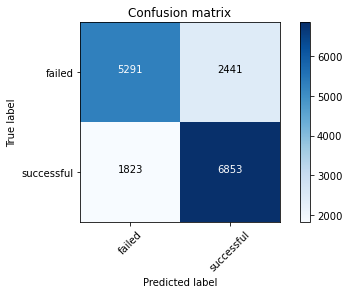

In [36]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['failed','successful'],normalize= False,  title='Confusion matrix')

### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               random_state=42, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

In [39]:
# Fit on training data
model.fit(X_train_preprocessed_st, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=42,
                       verbose=1)

In [40]:
y_pred = model.predict(X_test_preprocessed_st)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [41]:
# Training predictions (to demonstrate overfitting)
train_rf_predictions = model.predict(X_train_preprocessed_st)
train_rf_probs = model.predict_proba(X_train_preprocessed_st)[:, 1]

# Testing predictions (to determine performance)
rf_predictions = model.predict(X_test_preprocessed_st)
rf_probs = model.predict_proba(X_test_preprocessed_st)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


              precision    recall  f1-score   support

           0       0.87      0.76      0.81      7732
           1       0.81      0.90      0.85      8676

    accuracy                           0.83     16408
   macro avg       0.84      0.83      0.83     16408
weighted avg       0.84      0.83      0.83     16408

Confusion matrix, without normalization
[[5882 1850]
 [ 901 7775]]


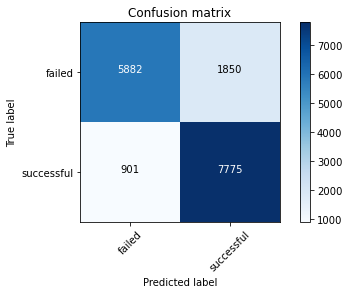

In [42]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['failed','successful'],normalize= False,  title='Confusion matrix')

In [43]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      7732
           1       0.81      0.90      0.85      8676

    accuracy                           0.83     16408
   macro avg       0.84      0.83      0.83     16408
weighted avg       0.84      0.83      0.83     16408

